# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

In [ ]:
#!pip install opencv-python

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2 as cv

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

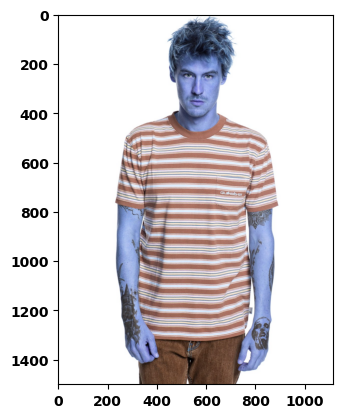

In [ ]:
img=cv.imread(r"C:/Users/HP/Desktop/Bootcamp/Week 4/Lab 3/exercise/testdata/testdata\\/men/00000001.jpg")
plt.imshow(img)

In [3]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/traindata', target_size=(64, 64), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/testdata/testdata', target_size=(64, 64), batch_size=32, class_mode='categorical', subset='validation')

Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [4]:
# Data Augmentation
# Example:
datagen_train = ImageDataGenerator(
   rescale=1./255,
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [5]:
# Build the model
# Example:
model = Sequential([
   Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
   MaxPooling2D(2, 2),
   Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Flatten(),
   Dense(128, activation='relu'),
   Dropout(0.5),
   Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [7]:
# Compile the model
# Example:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [8]:
# Train the model
# Example:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.6042 - loss: 0.7070 - val_accuracy: 0.6981 - val_loss: 0.6024
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 98s 710ms/step - accuracy: 0.6707 - loss: 0.6167 - val_accuracy: 0.6906 - val_loss: 0.5603
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 56s 690ms/step - accuracy: 0.7053 - loss: 0.5750 - val_accuracy: 0.7321 - val_loss: 0.5030
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 60s 762ms/step - accuracy: 0.7436 - loss: 0.5158 - val_accuracy: 0.7509 - val_loss: 0.5096
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 55s 703ms/step - accuracy: 0.7688 - loss: 0.4864 - val_accuracy: 0.7887 - val_loss: 0.4706
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 81s 682ms/step - accuracy: 0.7917 - loss: 0.4455 - val_accuracy: 0.7660 - val_loss: 0.4714
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 56s 714ms/step - accuracy: 0.8357 - loss: 0.3643 - val_accuracy: 0.8000 - val_loss: 0.4483
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 60s 779ms/step - accuracy: 0.8816 - loss: 0.3041 - val_accuracy: 0.7547 

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [9]:
# Evaluate the model
# Example:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 648ms/step - accuracy: 0.7535 - loss: 0.6667
Validation Loss: 0.6638628840446472
Validation Accuracy: 0.7509434223175049


## Step 8: Save the Model
Finally, save your trained model for future use.

In [10]:
# Save the model
# Example:
model.save('my_cnn_model.h5')